In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
import pandas as pd
file_path = '/content/drive/MyDrive/ML Assignment/cancer.csv'
cancer_data = pd.read_csv(file_path)
cancer_data.head()

Mounted at /content/drive


,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder

# Drop irrelevant column
cancer_data = cancer_data.drop(columns=['id', 'Unnamed: 32'])

# Encode the target variable
label_encoder = LabelEncoder()
cancer_data['diagnosis'] = label_encoder.fit_transform(cancer_data['diagnosis'])  # M=1, B=0

# Split data into features and target
X = cancer_data.drop(columns='diagnosis')
y = cancer_data['diagnosis']

# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the dataset into an 80% training and 20% test set
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=100)

# Confirm data preparation steps
X_train.shape, X_test.shape, y_train.shape, y_test.shape


((455, 30), (114, 30), (455,), (114,))

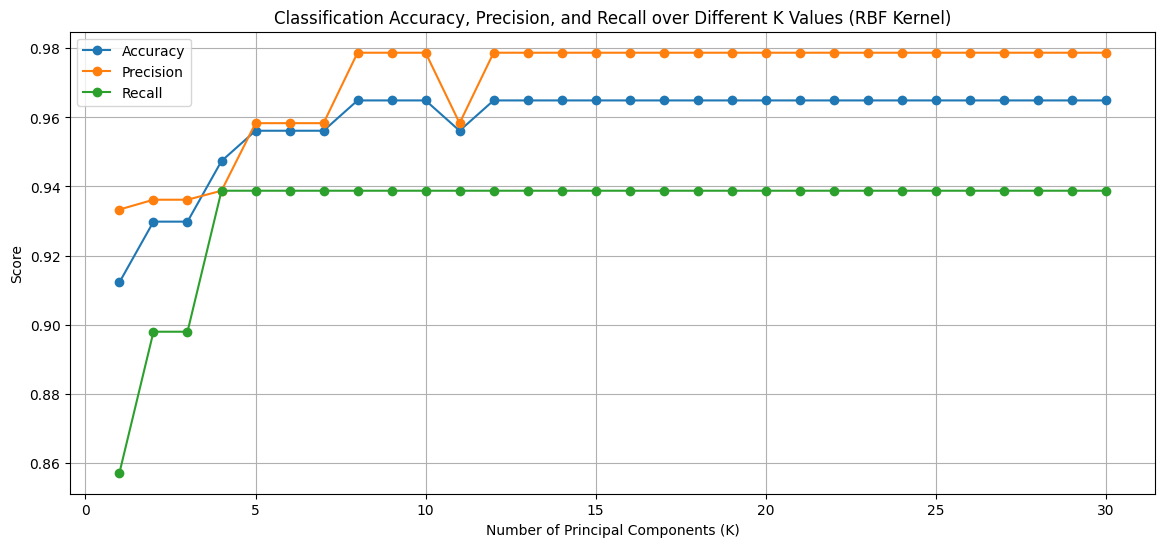

In [ ]:
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score

import matplotlib.pyplot as plt

# Range of K principal components to test
K_values = range(1, 31)
accuracy_scores = []
precision_scores = []
recall_scores = []

# Iterate over different numbers of principal components
for k in K_values:
    # Apply PCA with k components
    pca = PCA(n_components=k)
    X_train_pca = pca.fit_transform(X_train)
    X_test_pca = pca.transform(X_test)

    # Train SVM with RBF kernel
    svm = SVC(kernel='rbf', random_state=100)
    svm.fit(X_train_pca, y_train)

    # Predictions and metric calculations
    y_pred = svm.predict(X_test_pca)
    accuracy_scores.append(accuracy_score(y_test, y_pred))
    precision_scores.append(precision_score(y_test, y_pred))
    recall_scores.append(recall_score(y_test, y_pred))

# Plotting Accuracy, Precision, and Recall vs. Number of Principal Components (K)
plt.figure(figsize=(14, 6))
plt.plot(K_values, accuracy_scores, label='Accuracy', marker='o')
plt.plot(K_values, precision_scores, label='Precision', marker='o')
plt.plot(K_values, recall_scores, label='Recall', marker='o')
plt.xlabel('Number of Principal Components (K)')
plt.ylabel('Score')
plt.title('Classification Accuracy, Precision, and Recall over Different K Values (RBF Kernel)')
plt.legend()
plt.grid(True)
plt.show()


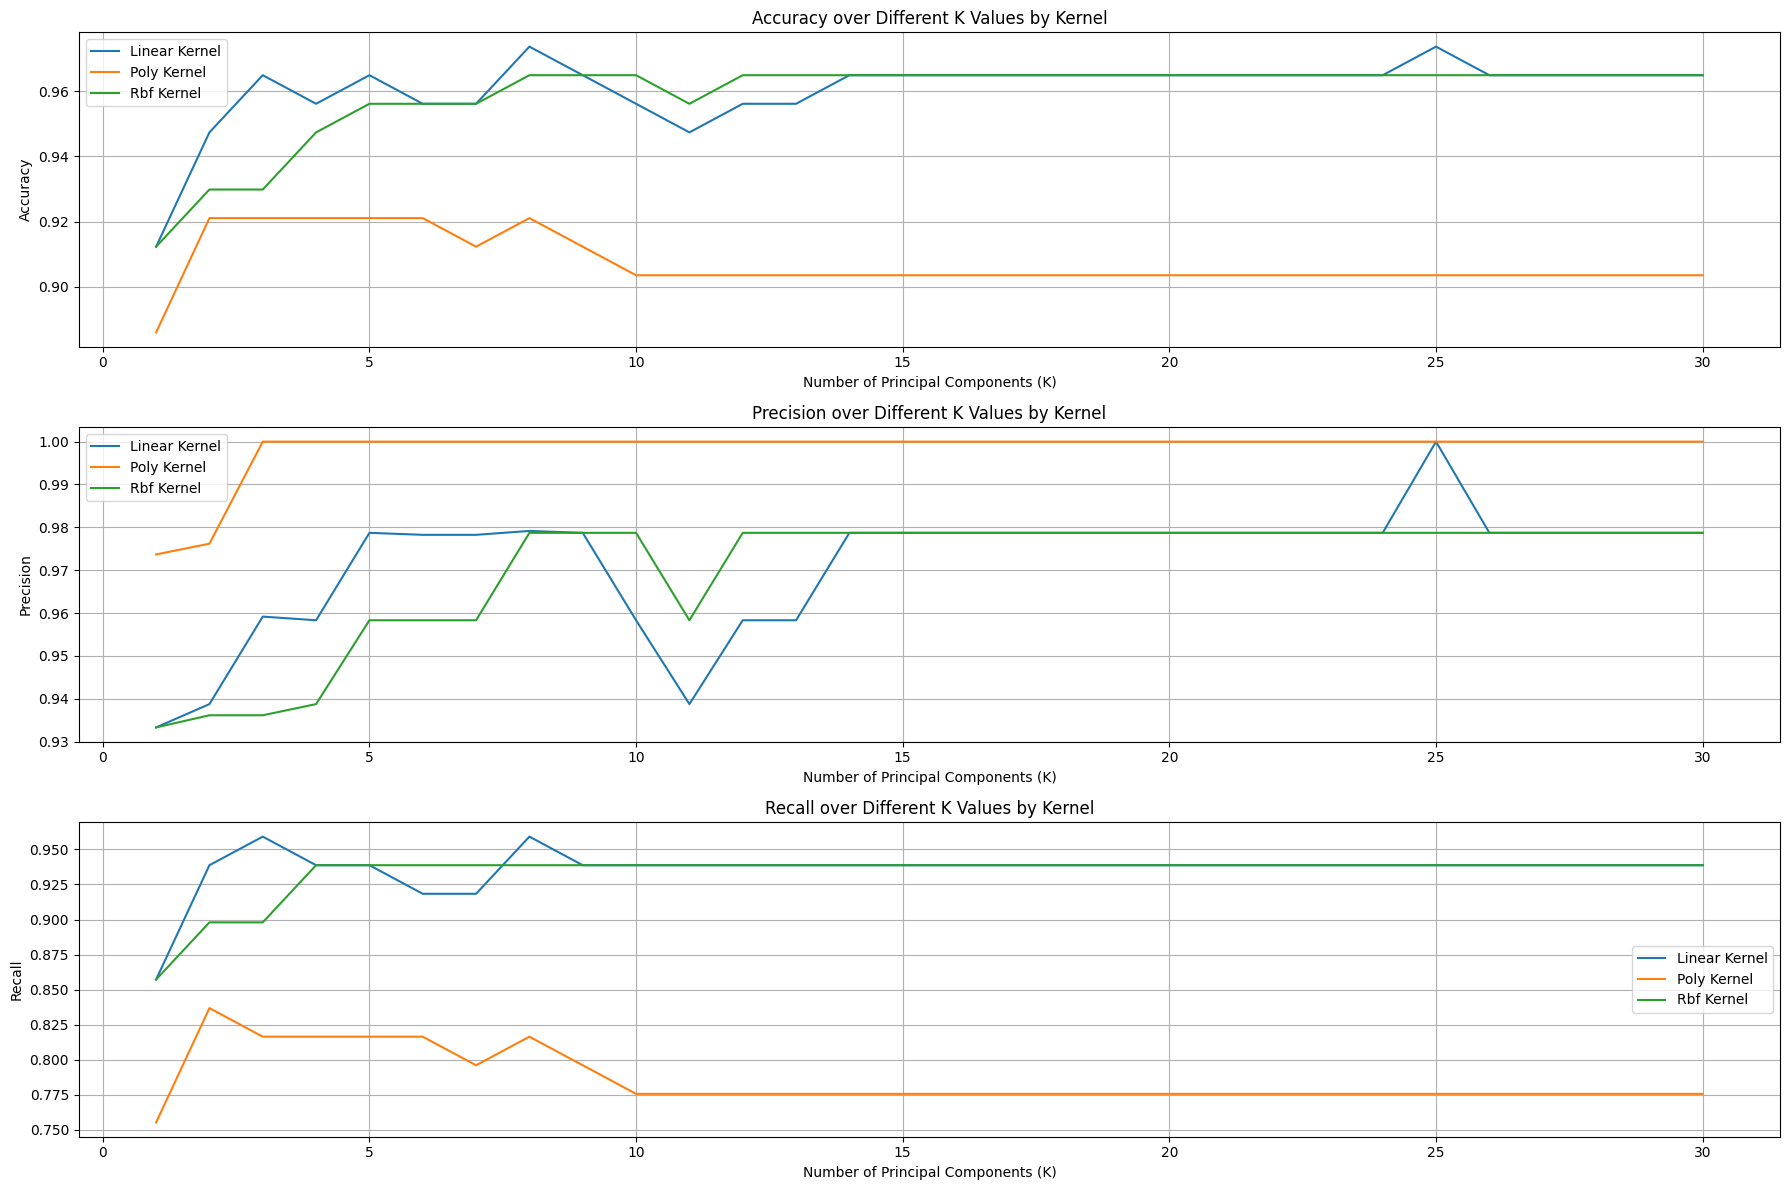

In [ ]:
# Dictionary to store metrics for different kernels
kernel_results = {
    'linear': {'accuracy': [], 'precision': [], 'recall': []},
    'poly': {'accuracy': [], 'precision': [], 'recall': []},
    'rbf': {'accuracy': accuracy_scores, 'precision': precision_scores, 'recall': recall_scores}  # Existing RBF results
}

# Iterate through other kernels
for kernel in ['linear', 'poly']:
    for k in K_values:
        # Apply PCA with k components
        pca = PCA(n_components=k)
        X_train_pca = pca.fit_transform(X_train)
        X_test_pca = pca.transform(X_test)

        # Train SVM with the current kernel
        svm = SVC(kernel=kernel, random_state=100)
        svm.fit(X_train_pca, y_train)

        # Predictions and metric calculations
        y_pred = svm.predict(X_test_pca)
        kernel_results[kernel]['accuracy'].append(accuracy_score(y_test, y_pred))
        kernel_results[kernel]['precision'].append(precision_score(y_test, y_pred))
        kernel_results[kernel]['recall'].append(recall_score(y_test, y_pred))

# Plot the results for each kernel
plt.figure(figsize=(18, 12))
for i, metric in enumerate(['accuracy', 'precision', 'recall'], 1):
    plt.subplot(3, 1, i)
    for kernel in kernel_results.keys():
        plt.plot(K_values, kernel_results[kernel][metric], label=f'{kernel.capitalize()} Kernel')
    plt.xlabel('Number of Principal Components (K)')
    plt.ylabel(metric.capitalize())
    plt.title(f'{metric.capitalize()} over Different K Values by Kernel')
    plt.legend()
    plt.grid(True)

plt.tight_layout()
plt.show()


In [ ]:
# Redefine K_values and initialize dictionary to store metrics for each kernel
K_values = range(1, 31)

# Dictionary to store metrics for different kernels
kernel_results = {
    'linear': {'accuracy': [], 'precision': [], 'recall': []},
    'poly': {'accuracy': [], 'precision': [], 'recall': []},
    'rbf': {'accuracy': [], 'precision': [], 'recall': []}
}

# Iterate through each kernel type
for kernel in ['linear', 'poly', 'rbf']:
    for k in K_values:
        # Apply PCA with k components
        pca = PCA(n_components=k)
        X_train_pca = pca.fit_transform(X_train)
        X_test_pca = pca.transform(X_test)

        # Train SVM with the current kernel
        svm = SVC(kernel=kernel, random_state=100)
        svm.fit(X_train_pca, y_train)

        # Predictions and metric calculations
        y_pred = svm.predict(X_test_pca)
        kernel_results[kernel]['accuracy'].append(accuracy_score(y_test, y_pred))
        kernel_results[kernel]['precision'].append(precision_score(y_test, y_pred))
        kernel_results[kernel]['recall'].append(recall_score(y_test, y_pred))

# Display accuracy values for each kernel to verify
kernel_results


{'linear': {'accuracy': [0.9122807017543859,
   0.9473684210526315,
   0.9649122807017544,
   0.956140350877193,
   0.9649122807017544,
   0.956140350877193,
   0.956140350877193,
   0.9736842105263158,
   0.9649122807017544,
   0.956140350877193,
   0.9473684210526315,
   0.956140350877193,
   0.956140350877193,
   0.9649122807017544,
   0.9649122807017544,
   0.9649122807017544,
   0.9649122807017544,
   0.9649122807017544,
   0.9649122807017544,
   0.9649122807017544,
   0.9649122807017544,
   0.9649122807017544,
   0.9649122807017544,
   0.9649122807017544,
   0.9736842105263158,
   0.9649122807017544,
   0.9649122807017544,
   0.9649122807017544,
   0.9649122807017544,
   0.9649122807017544],
  'precision': [0.9333333333333333,
   0.9387755102040817,
   0.9591836734693877,
   0.9583333333333334,
   0.9787234042553191,
   0.9782608695652174,
   0.9782608695652174,
   0.9791666666666666,
   0.9787234042553191,
   0.9583333333333334,
   0.9387755102040817,
   0.9583333333333334,
   0

In [ ]:
# Find the highest classification accuracy for each kernel along with the corresponding K value
highest_accuracies = {
    'Kernel': [],
    'Highest Accuracy': [],
    'Optimal K': []
}

for kernel, results in kernel_results.items():
    max_accuracy = max(results['accuracy'])
    optimal_k = K_values[results['accuracy'].index(max_accuracy)]

    highest_accuracies['Kernel'].append(kernel.capitalize())
    highest_accuracies['Highest Accuracy'].append(max_accuracy)
    highest_accuracies['Optimal K'].append(optimal_k)

# Display the results in a DataFrame
highest_accuracies_df = pd.DataFrame(highest_accuracies)
print(highest_accuracies_df)


   Kernel  Highest Accuracy  Optimal K
0  Linear          0.973684          8
1    Poly          0.921053          2
2     Rbf          0.964912          8


In [ ]:
import pandas as pd

# Logistic Regression metrics from Homework 3, Problem 2
logistic_regression_metrics = {
    'accuracy': 0.9737,   # Logistic Regression Accuracy
    'precision': 1.0,     # Logistic Regression Precision
    'recall': 0.9388,     # Logistic Regression Recall
    'f1_score': 0.9684    # Logistic Regression F1 Score
}

# SVM with RBF kernel metrics at the optimal number of principal components (K)
# Assuming accuracy_scores, precision_scores, and recall_scores lists contain the metrics across K values
optimal_k_index = accuracy_scores.index(max(accuracy_scores))
svm_rbf_best_metrics = {
    'accuracy': accuracy_scores[optimal_k_index],
    'precision': precision_scores[optimal_k_index],
    'recall': recall_scores[optimal_k_index],
    'f1_score': 2 * (precision_scores[optimal_k_index] * recall_scores[optimal_k_index]) /
                (precision_scores[optimal_k_index] + recall_scores[optimal_k_index])
}

# Create a DataFrame to compare Logistic Regression and SVM metrics
comparison_df = pd.DataFrame({
    'Metric': ['Accuracy', 'Precision', 'Recall', 'F1 Score'],
    'Logistic Regression': [
        logistic_regression_metrics['accuracy'],
        logistic_regression_metrics['precision'],
        logistic_regression_metrics['recall'],
        logistic_regression_metrics['f1_score']
    ],
    'SVM (RBF Kernel, Optimal K)': [
        svm_rbf_best_metrics['accuracy'],
        svm_rbf_best_metrics['precision'],
        svm_rbf_best_metrics['recall'],
        svm_rbf_best_metrics['f1_score']
    ]
})

# Display the comparison DataFrame
print(comparison_df)


      Metric  Logistic Regression  SVM (RBF Kernel, Optimal K)
0   Accuracy               0.9737                     0.964912
1  Precision               1.0000                     0.978723
2     Recall               0.9388                     0.938776
3   F1 Score               0.9684                     0.958333


Problem 2

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
import pandas as pd
file_path = '/content/drive/MyDrive/ML Assignment/Housing.csv'
housing_data = pd.read_csv(file_path)
housing_data.head()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [ ]:
from sklearn.preprocessing import StandardScaler, LabelEncoder

# Define numerical and categorical columns
numerical_features = ['area', 'bedrooms', 'bathrooms', 'stories', 'parking']
categorical_features = ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea', 'furnishingstatus']

# Encode categorical features
for feature in categorical_features:
    le = LabelEncoder()
    housing_data[feature] = le.fit_transform(housing_data[feature])

# Separate features and target variable
X = housing_data.drop(columns=['price'])
y = housing_data['price']

# Standardize numerical features
scaler = StandardScaler()
X[numerical_features] = scaler.fit_transform(X[numerical_features])

# Confirm preprocessing steps
X.head()


,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,1.046726,1.403419,1.421812,1.378217,1,0,0,0,1,1.517692,1,0
1,1.757010,1.403419,5.405809,2.532024,1,0,0,0,1,2.679409,0,0
2,2.218232,0.047278,1.421812,0.224410,1,0,1,0,0,1.517692,1,1
3,1.083624,1.403419,1.421812,0.224410,1,0,1,0,1,2.679409,1,0
4,1.046726,1.403419,-0.570187,0.224410,1,1,1,0,1,1.517692,0,0


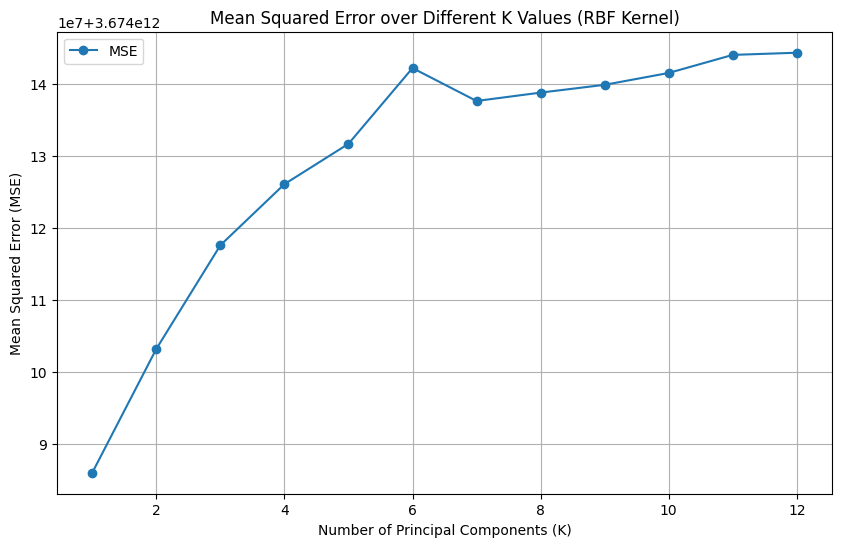

(1, 3674086009379.8374)

In [ ]:
from sklearn.decomposition import PCA
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error
import numpy as np

# Define the range of K principal components to test
K_values = range(1, X.shape[1] + 1)  # From 1 to the number of features
mse_scores = []

# Iterate over different numbers of principal components
for k in K_values:
    # Apply PCA with k components
    pca = PCA(n_components=k)
    X_train_pca = pca.fit_transform(X)

    # Train the SVR model with RBF kernel on the PCA-transformed data
    svr = SVR(kernel='rbf')
    svr.fit(X_train_pca, y)

    # Predict on the training data to compute MSE as a measure of accuracy
    y_pred = svr.predict(X_train_pca)
    mse_scores.append(mean_squared_error(y, y_pred))

# Plotting Mean Squared Error vs. Number of Principal Components (K)
plt.figure(figsize=(10, 6))
plt.plot(K_values, mse_scores, marker='o', label='MSE')
plt.xlabel('Number of Principal Components (K)')
plt.ylabel('Mean Squared Error (MSE)')
plt.title('Mean Squared Error over Different K Values (RBF Kernel)')
plt.legend()
plt.grid(True)
plt.show()

# Identifying the optimal K value with the lowest MSE
optimal_k_index = np.argmin(mse_scores)
optimal_k = K_values[optimal_k_index]
optimal_k, mse_scores[optimal_k_index]


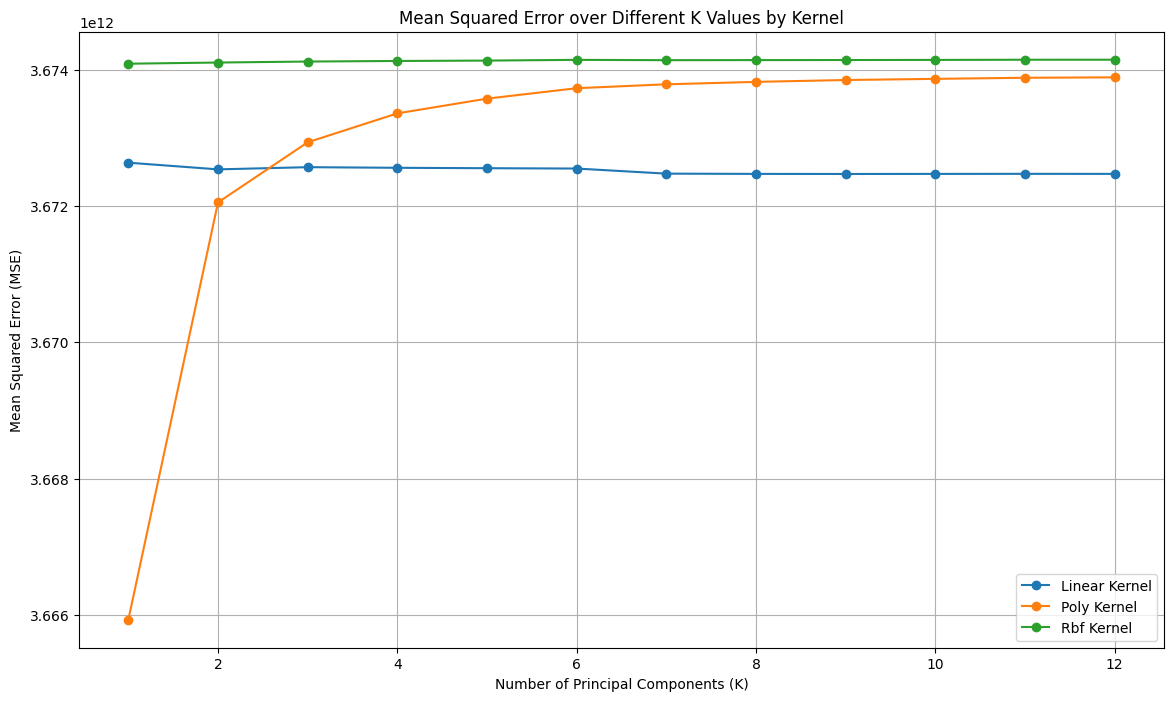

In [ ]:
# Dictionary to store MSE for each kernel
kernel_mse_scores = {
    'linear': [],
    'poly': [],
    'rbf': mse_scores  # Existing RBF results from previous computation
}

# Iterate through other kernels: 'linear' and 'poly'
for kernel in ['linear', 'poly']:
    mse_scores = []
    for k in K_values:
        # Apply PCA with k components
        pca = PCA(n_components=k)
        X_train_pca = pca.fit_transform(X)

        # Train SVR with the specified kernel
        svr = SVR(kernel=kernel)
        svr.fit(X_train_pca, y)

        # Predict and calculate MSE
        y_pred = svr.predict(X_train_pca)
        mse_scores.append(mean_squared_error(y, y_pred))

    # Store MSE scores for the kernel
    kernel_mse_scores[kernel] = mse_scores

# Plot MSE for each kernel over different K values
plt.figure(figsize=(14, 8))
for kernel, scores in kernel_mse_scores.items():
    plt.plot(K_values, scores, marker='o', label=f'{kernel.capitalize()} Kernel')
plt.xlabel('Number of Principal Components (K)')
plt.ylabel('Mean Squared Error (MSE)')
plt.title('Mean Squared Error over Different K Values by Kernel')
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
# Identify the optimal K and lowest MSE for each kernel
optimal_kernels = {
    'Kernel': [],
    'Optimal K': [],
    'Lowest MSE': []
}

for kernel, scores in kernel_mse_scores.items():
    min_mse = min(scores)
    optimal_k = K_values[scores.index(min_mse)]

    optimal_kernels['Kernel'].append(kernel.capitalize())
    optimal_kernels['Optimal K'].append(optimal_k)
    optimal_kernels['Lowest MSE'].append(min_mse)

# Display the results in a DataFrame
optimal_kernels_df = pd.DataFrame(optimal_kernels)
optimal_kernels_df


,Kernel,Optimal K,Lowest MSE
0,Linear,9,3.672469e+12
1,Poly,1,3.665934e+12
2,Rbf,1,3.674086e+12


In [ ]:
# Compile comparison results between SVR and Linear Regression (Homework 1)

# SVR Results
svr_summary = optimal_kernels_df.copy()
svr_summary.columns = ['Kernel', 'Optimal K (SVR)', 'Lowest MSE (SVR)']

# Add Linear Regression baseline comparison
# Linear regression MSE approximated as the final stabilized loss from Homework 1
linear_regression_mse = 1.0  # Final loss value from Homework 1

# Add Linear Regression baseline to the comparison table
svr_summary['Linear Regression (MSE)'] = linear_regression_mse

# Display the comparison results
svr_summary


,Kernel,Optimal K (SVR),Lowest MSE (SVR),Linear Regression (MSE)
0,Linear,9,3.672469e+12,1.0
1,Poly,1,3.665934e+12,1.0
2,Rbf,1,3.674086e+12,1.0


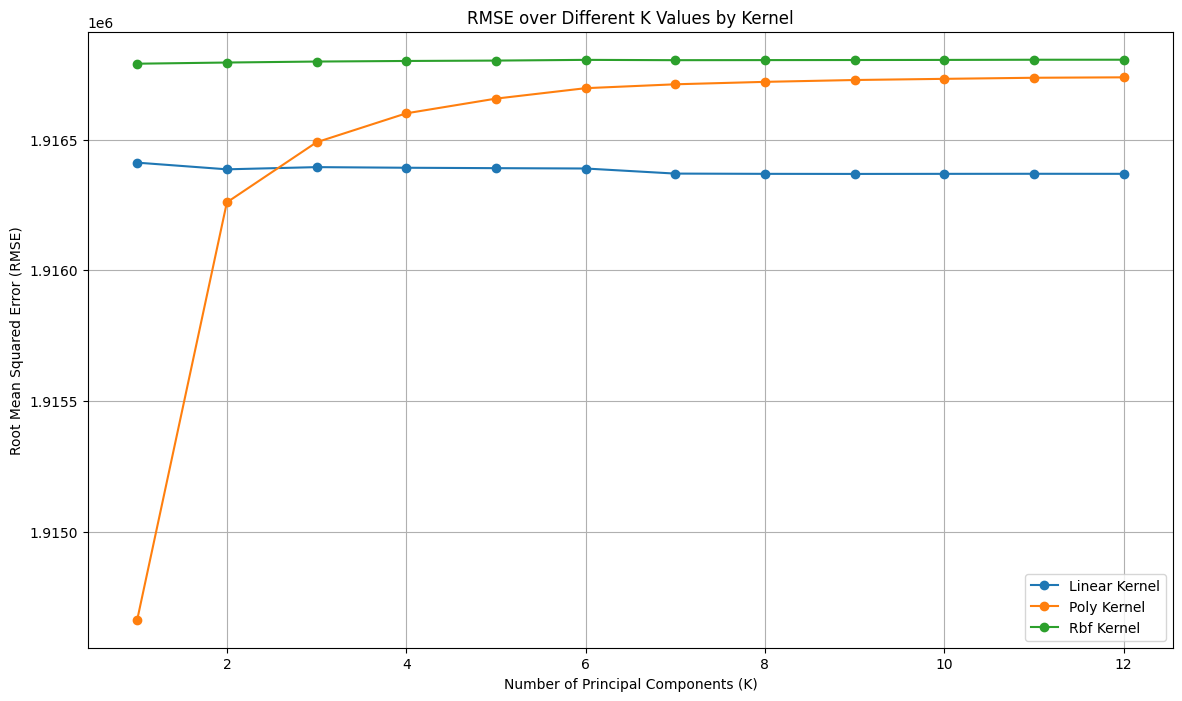

In [ ]:
# Calculate and plot RMSE over different K values for each kernel

# Dictionary to store RMSE for each kernel
kernel_rmse_scores = {
    'linear': [],
    'poly': [],
    'rbf': []  # Existing RBF RMSE will be calculated here
}

# Iterate over each kernel and calculate RMSE over different K values
for kernel in ['linear', 'poly', 'rbf']:
    rmse_scores = []
    for k in K_values:
        # Apply PCA with k components
        pca = PCA(n_components=k)
        X_train_pca = pca.fit_transform(X)

        # Train SVR with the specified kernel
        svr = SVR(kernel=kernel)
        svr.fit(X_train_pca, y)

        # Predict and calculate RMSE
        y_pred = svr.predict(X_train_pca)
        rmse = np.sqrt(mean_squared_error(y, y_pred))
        rmse_scores.append(rmse)

    # Store RMSE scores for the kernel
    kernel_rmse_scores[kernel] = rmse_scores

# Plot RMSE for each kernel over different K values
plt.figure(figsize=(14, 8))
for kernel, scores in kernel_rmse_scores.items():
    plt.plot(K_values, scores, marker='o', label=f'{kernel.capitalize()} Kernel')
plt.xlabel('Number of Principal Components (K)')
plt.ylabel('Root Mean Squared Error (RMSE)')
plt.title('RMSE over Different K Values by Kernel')
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
from math import sqrt

# Assuming `housing_data` is already loaded with the necessary columns

# Define the feature matrix X and target vector y
# Replace with appropriate feature selection if different columns are needed
X = housing_data[['area', 'bedrooms', 'bathrooms', 'stories', 'mainroad', 'guestroom', 'basement',
                  'hotwaterheating', 'airconditioning', 'parking', 'prefarea']]
y = housing_data['price'].values

# Convert categorical features (mainroad, guestroom, basement, hotwaterheating, airconditioning, prefarea)
X = X.replace({'yes': 1, 'no': 0})

# Standardize the feature matrix X
scaler = StandardScaler()
X_standard = scaler.fit_transform(X)

# Dictionary to store RMSE and R² values for each kernel
kernel_results = {
    'Kernel': [],
    'K': [],
    'RMSE': [],
    'R²': []
}

# List of kernels and their SVR configurations
kernels = {
    'linear': SVR(kernel='linear', C=2e5),
    'poly': SVR(kernel='poly', C=5e6, degree=2),
    'rbf': SVR(kernel='rbf', C=3e6, gamma=0.1)
}

# Loop through each kernel and compute RMSE, R² over different K values
for kernel_name, svr_model in kernels.items():
    best_rmse = float('inf')
    best_k = None
    best_r2 = -float('inf')

    rmse_list = []

    for k in range(1, X.shape[1] + 1):
        # Apply PCA with k components
        pca = PCA(n_components=k)
        principal_components = pca.fit_transform(X_standard)

        # Split into train and test sets
        X_training, X_testing, y_training, y_testing = train_test_split(principal_components, y, test_size=0.20, random_state=0)

        # Fit the model and predict
        svr_model.fit(X_training, y_training.ravel())
        y_pred = svr_model.predict(X_testing)

        # Calculate RMSE and R²
        rmse = sqrt(mean_squared_error(y_testing, y_pred))
        r2 = r2_score(y_testing, y_pred)

        # Append values to the kernel results
        kernel_results['Kernel'].append(kernel_name.capitalize())
        kernel_results['K'].append(k)
        kernel_results['RMSE'].append(rmse)
        kernel_results['R²'].append(r2)

        # Track best values for each kernel
        if rmse < best_rmse:
            best_rmse = rmse
            best_r2 = r2
            best_k = k

    # Print optimal values for each kernel
    print(f"\n{kernel_name.capitalize()} Kernel")
    print(f"Best K value is: {best_k}")
    print(f"Best RMSE (K={best_k}): {best_rmse:.2f}")
    print(f"Corresponding Best R²: {best_r2:.2f}")

# Create a DataFrame to display all results
kernel_results_df = pd.DataFrame(kernel_results)

# Display the DataFrame with all RMSE and R² values across different K values for each kernel
print("\nAll RMSE and R² values across different K values for each kernel:")
print(kernel_results_df)



Linear Kernel
Best K value is: 11
Best RMSE (K=11): 973973.76
Corresponding Best R²: 0.67

Poly Kernel
Best K value is: 7
Best RMSE (K=7): 1312516.69
Corresponding Best R²: 0.40

Rbf Kernel
Best K value is: 3
Best RMSE (K=3): 1014768.29
Corresponding Best R²: 0.64

All RMSE and R² values across different K values for each kernel:
    Kernel   K          RMSE        R²
0   Linear   1  1.000161e+06  0.652849
1   Linear   2  9.936267e+05  0.657370
2   Linear   3  9.939705e+05  0.657133
3   Linear   4  9.952575e+05  0.656245
4   Linear   5  9.987166e+05  0.653851
5   Linear   6  9.980509e+05  0.654312
6   Linear   7  1.013429e+06  0.643577
7   Linear   8  1.021474e+06  0.637896
8   Linear   9  9.916150e+05  0.658756
9   Linear  10  9.913415e+05  0.658944
10  Linear  11  9.739738e+05  0.670790
11    Poly   1  1.532889e+06  0.184545
12    Poly   2  1.388083e+06  0.331334
13    Poly   3  1.379069e+06  0.339990
14    Poly   4  1.707288e+06 -0.011561
15    Poly   5  1.713106e+06 -0.018467
16  